<a href="https://colab.research.google.com/github/kingori-wanjiru/python_code/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving blue.jpg to blue.jpg


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


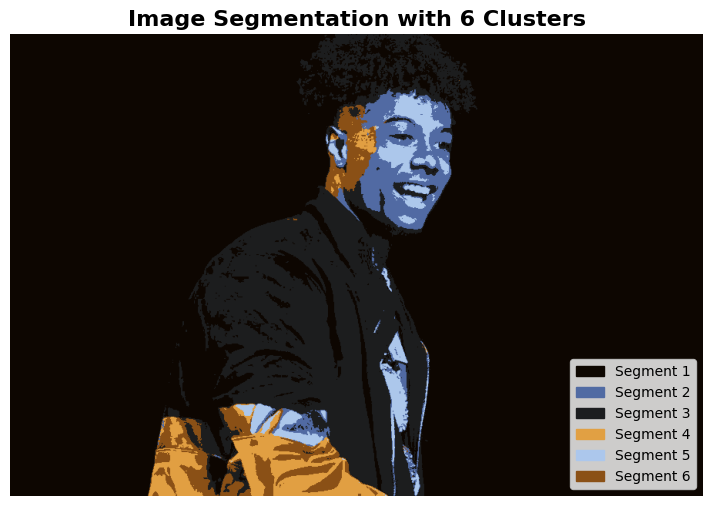

In [1]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
#Upload the image
uploaded = files.upload()
image = cv2.imdecode(np.frombuffer(uploaded[next(iter(uploaded))], np.uint8), -1)
# Load and preprocess the image
#image = cv2.imread('blue.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, _ = image.shape
reshaped_image = image.reshape(-1, 3)
# Perform K-Means clustering
k = 6 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0).fit(reshaped_image)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
# Create a color-coded segmentation map
segmented_image = centers[labels].reshape(height, width, 3).astype('uint8')
# Create a title for the output
title = f"Image Segmentation with {k} Clusters"
# Define segment labels based on colors
segment_labels = [f"Segment {i+1}" for i in range(k)]
# Visualize the segmented image with title and a legend for colors
plt.figure(figsize=(10, 6))
# Display the segmented image
plt.imshow(segmented_image)
plt.axis('off')
# Add a title using plt.title
plt.title(title, fontsize=16, fontweight='bold')
# Create a legend for colors
legend_patches = [mpatches.Patch(color=centers[i] / 255, label=segment_labels[i]) for i in range(k)]
plt.legend(handles=legend_patches, loc='lower right')
plt.show()